In [84]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [67]:
df = pd.read_csv("Asteroid.csv")

df.head(5)

C:\Users\abhia\AppData\Local\Temp\ipykernel_6320\2821336668.py:1: DtypeWarning: Columns (11,14,15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Asteroid.csv")


,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


<AxesSubplot: >

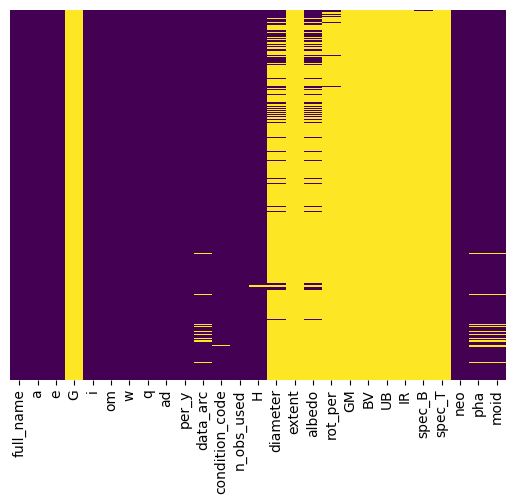

In [68]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
toDrop = ['G','extent','albedo','rot_per','GM','BV','UB','IR','spec_B','spec_T']
df.drop(toDrop, inplace = True, axis = 1)
df.drop(df[df['diameter'].isnull()].index,inplace = True)

In [70]:
df.isnull().sum()

full_name           0
a                   0
e                   0
i                   0
om                  0
w                   0
q                   0
ad                  0
per_y               0
data_arc          140
condition_code      0
n_obs_used          0
H                 751
diameter            0
neo                 0
pha                 0
moid                0
dtype: int64

<AxesSubplot: >

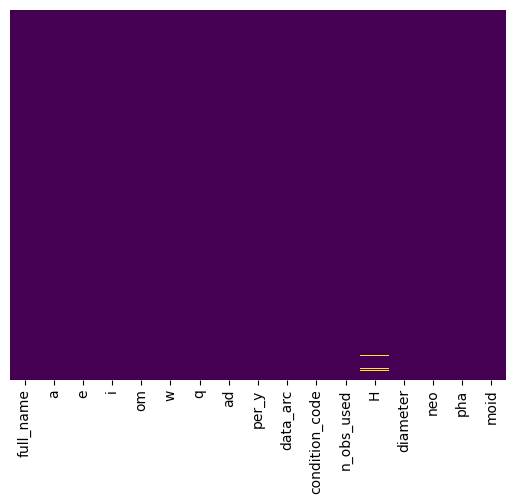

In [71]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
df.shape

(137681, 17)

In [73]:
df.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
diameter           object
neo                object
pha                object
moid              float64
dtype: object

In [74]:
df['diameter'] = df['diameter'].astype('float')
df['condition_code'] = df['condition_code'].astype('float')

C:\Users\abhia\AppData\Local\Temp\ipykernel_6320\357754966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

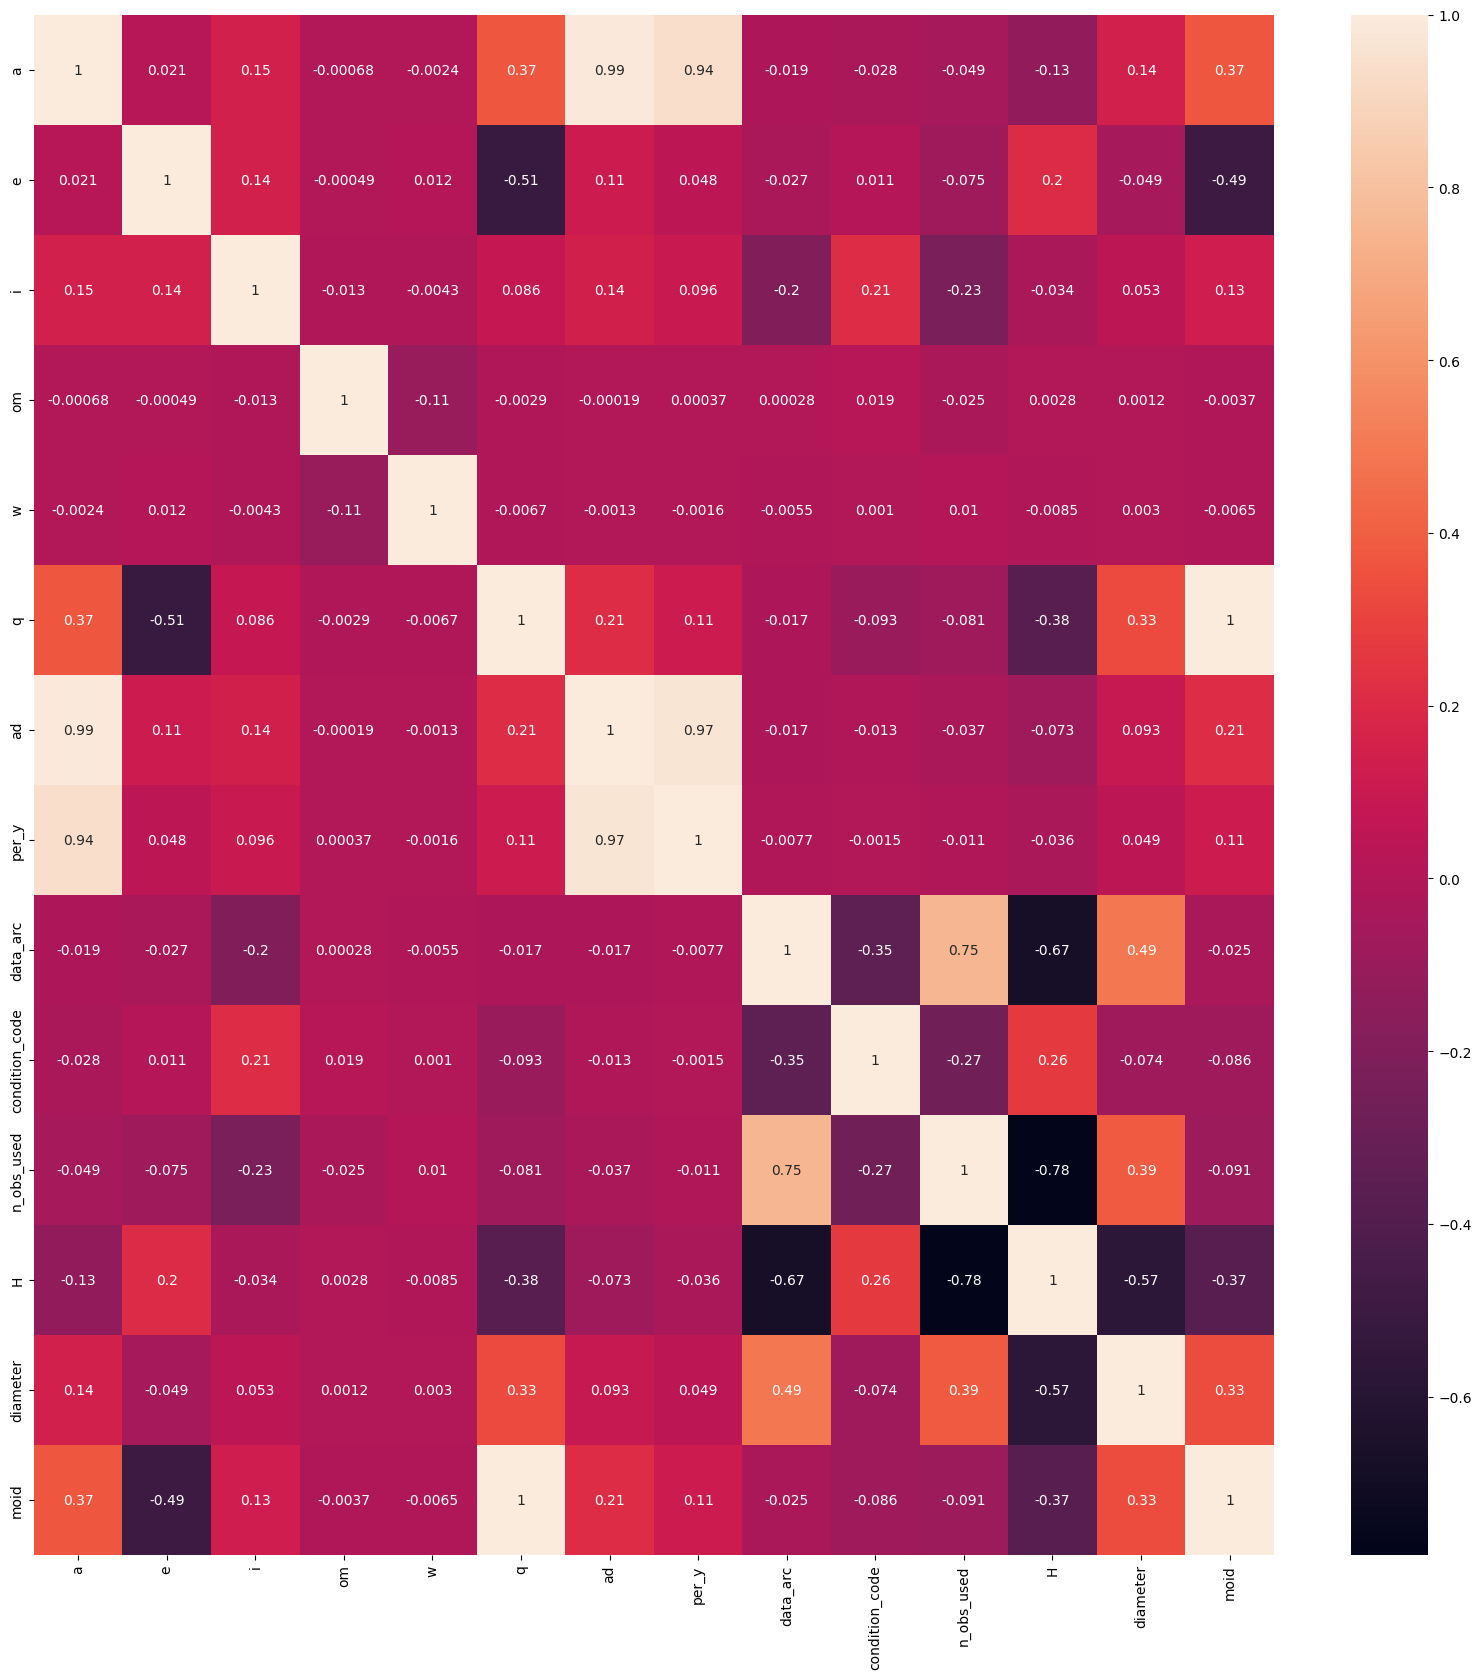

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

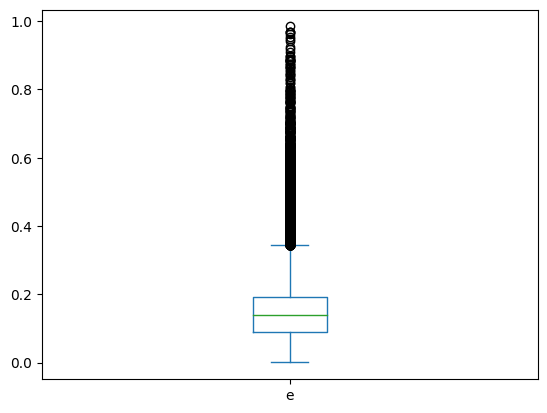

In [76]:
df.e.plot(kind="box")

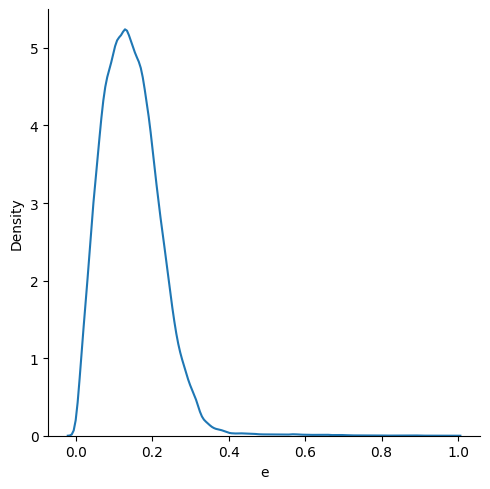

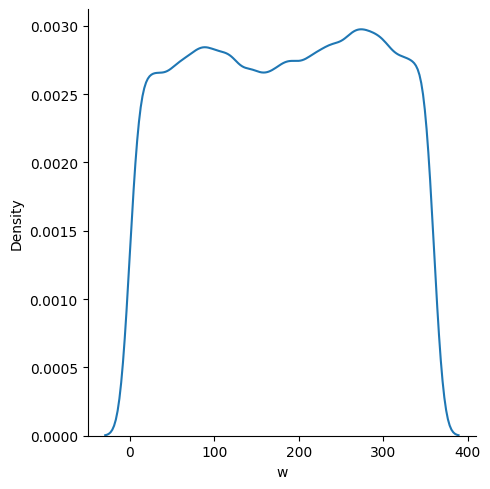

In [78]:
sns.displot(df,x='e',kind='kde')
sns.displot(df,x='w',kind='kde')

<AxesSubplot: xlabel='diameter', ylabel='n_obs_used'>

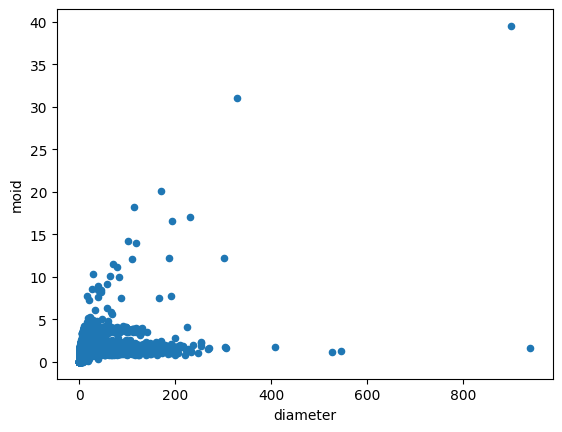

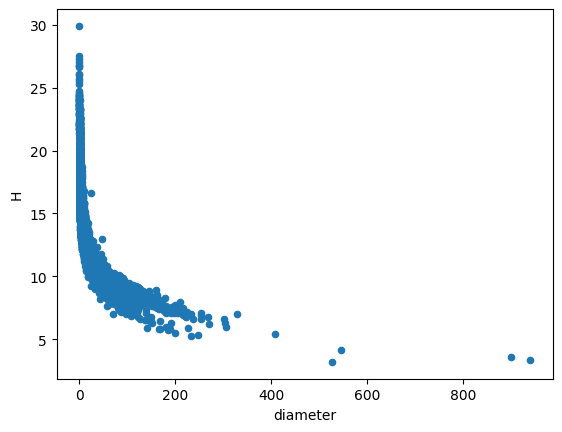

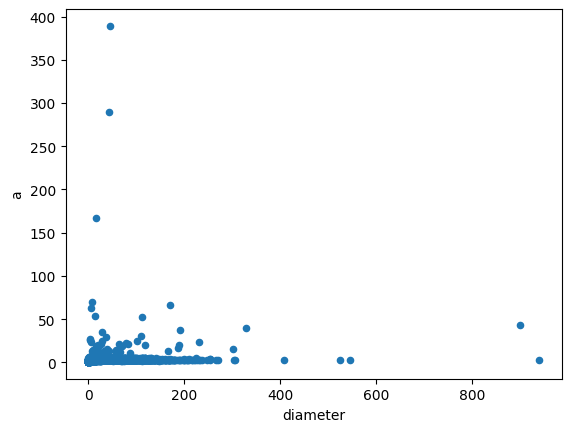

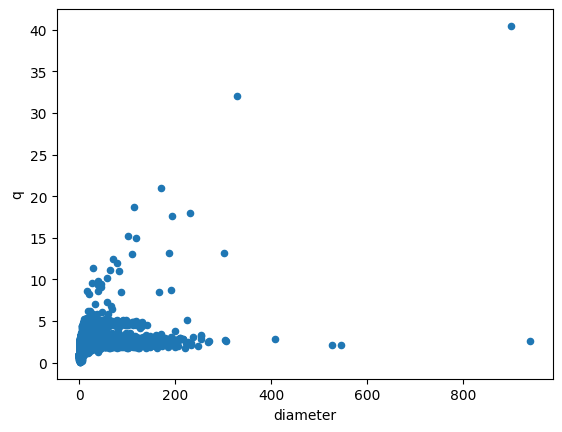

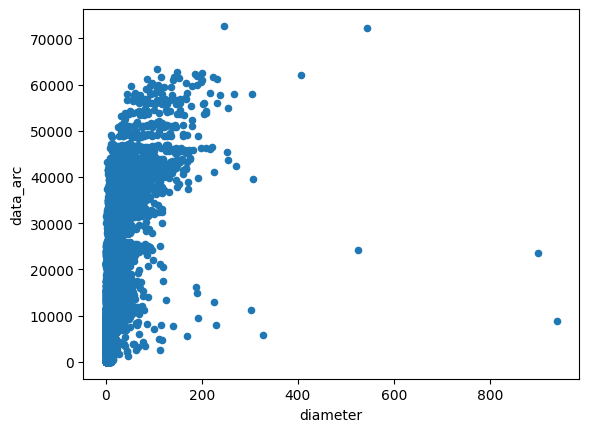

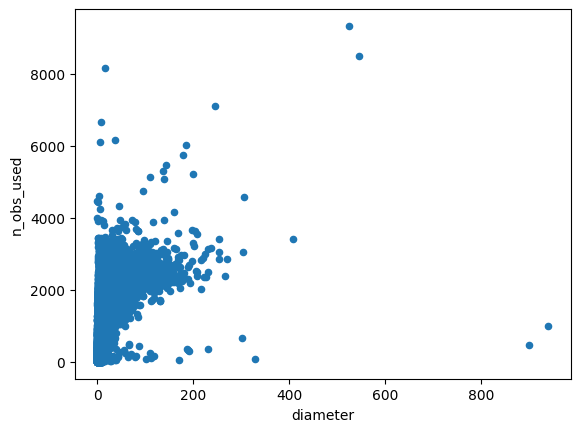

In [82]:
df.plot(kind = 'scatter', x = 'diameter', y = 'moid')
df.plot(kind = 'scatter', x = 'diameter', y = 'H')
df.plot(kind = 'scatter', x = 'diameter', y = 'a')
df.plot(kind = 'scatter', x = 'diameter', y = 'q')
df.plot(kind = 'scatter', x = 'diameter', y = 'data_arc')
df.plot(kind = 'scatter', x = 'diameter', y = 'n_obs_used')

In [85]:
o1=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [88]:
df['neo']=o1.fit_transform(df[['neo']])
df['pha']=o1.fit_transform(df[['pha']])

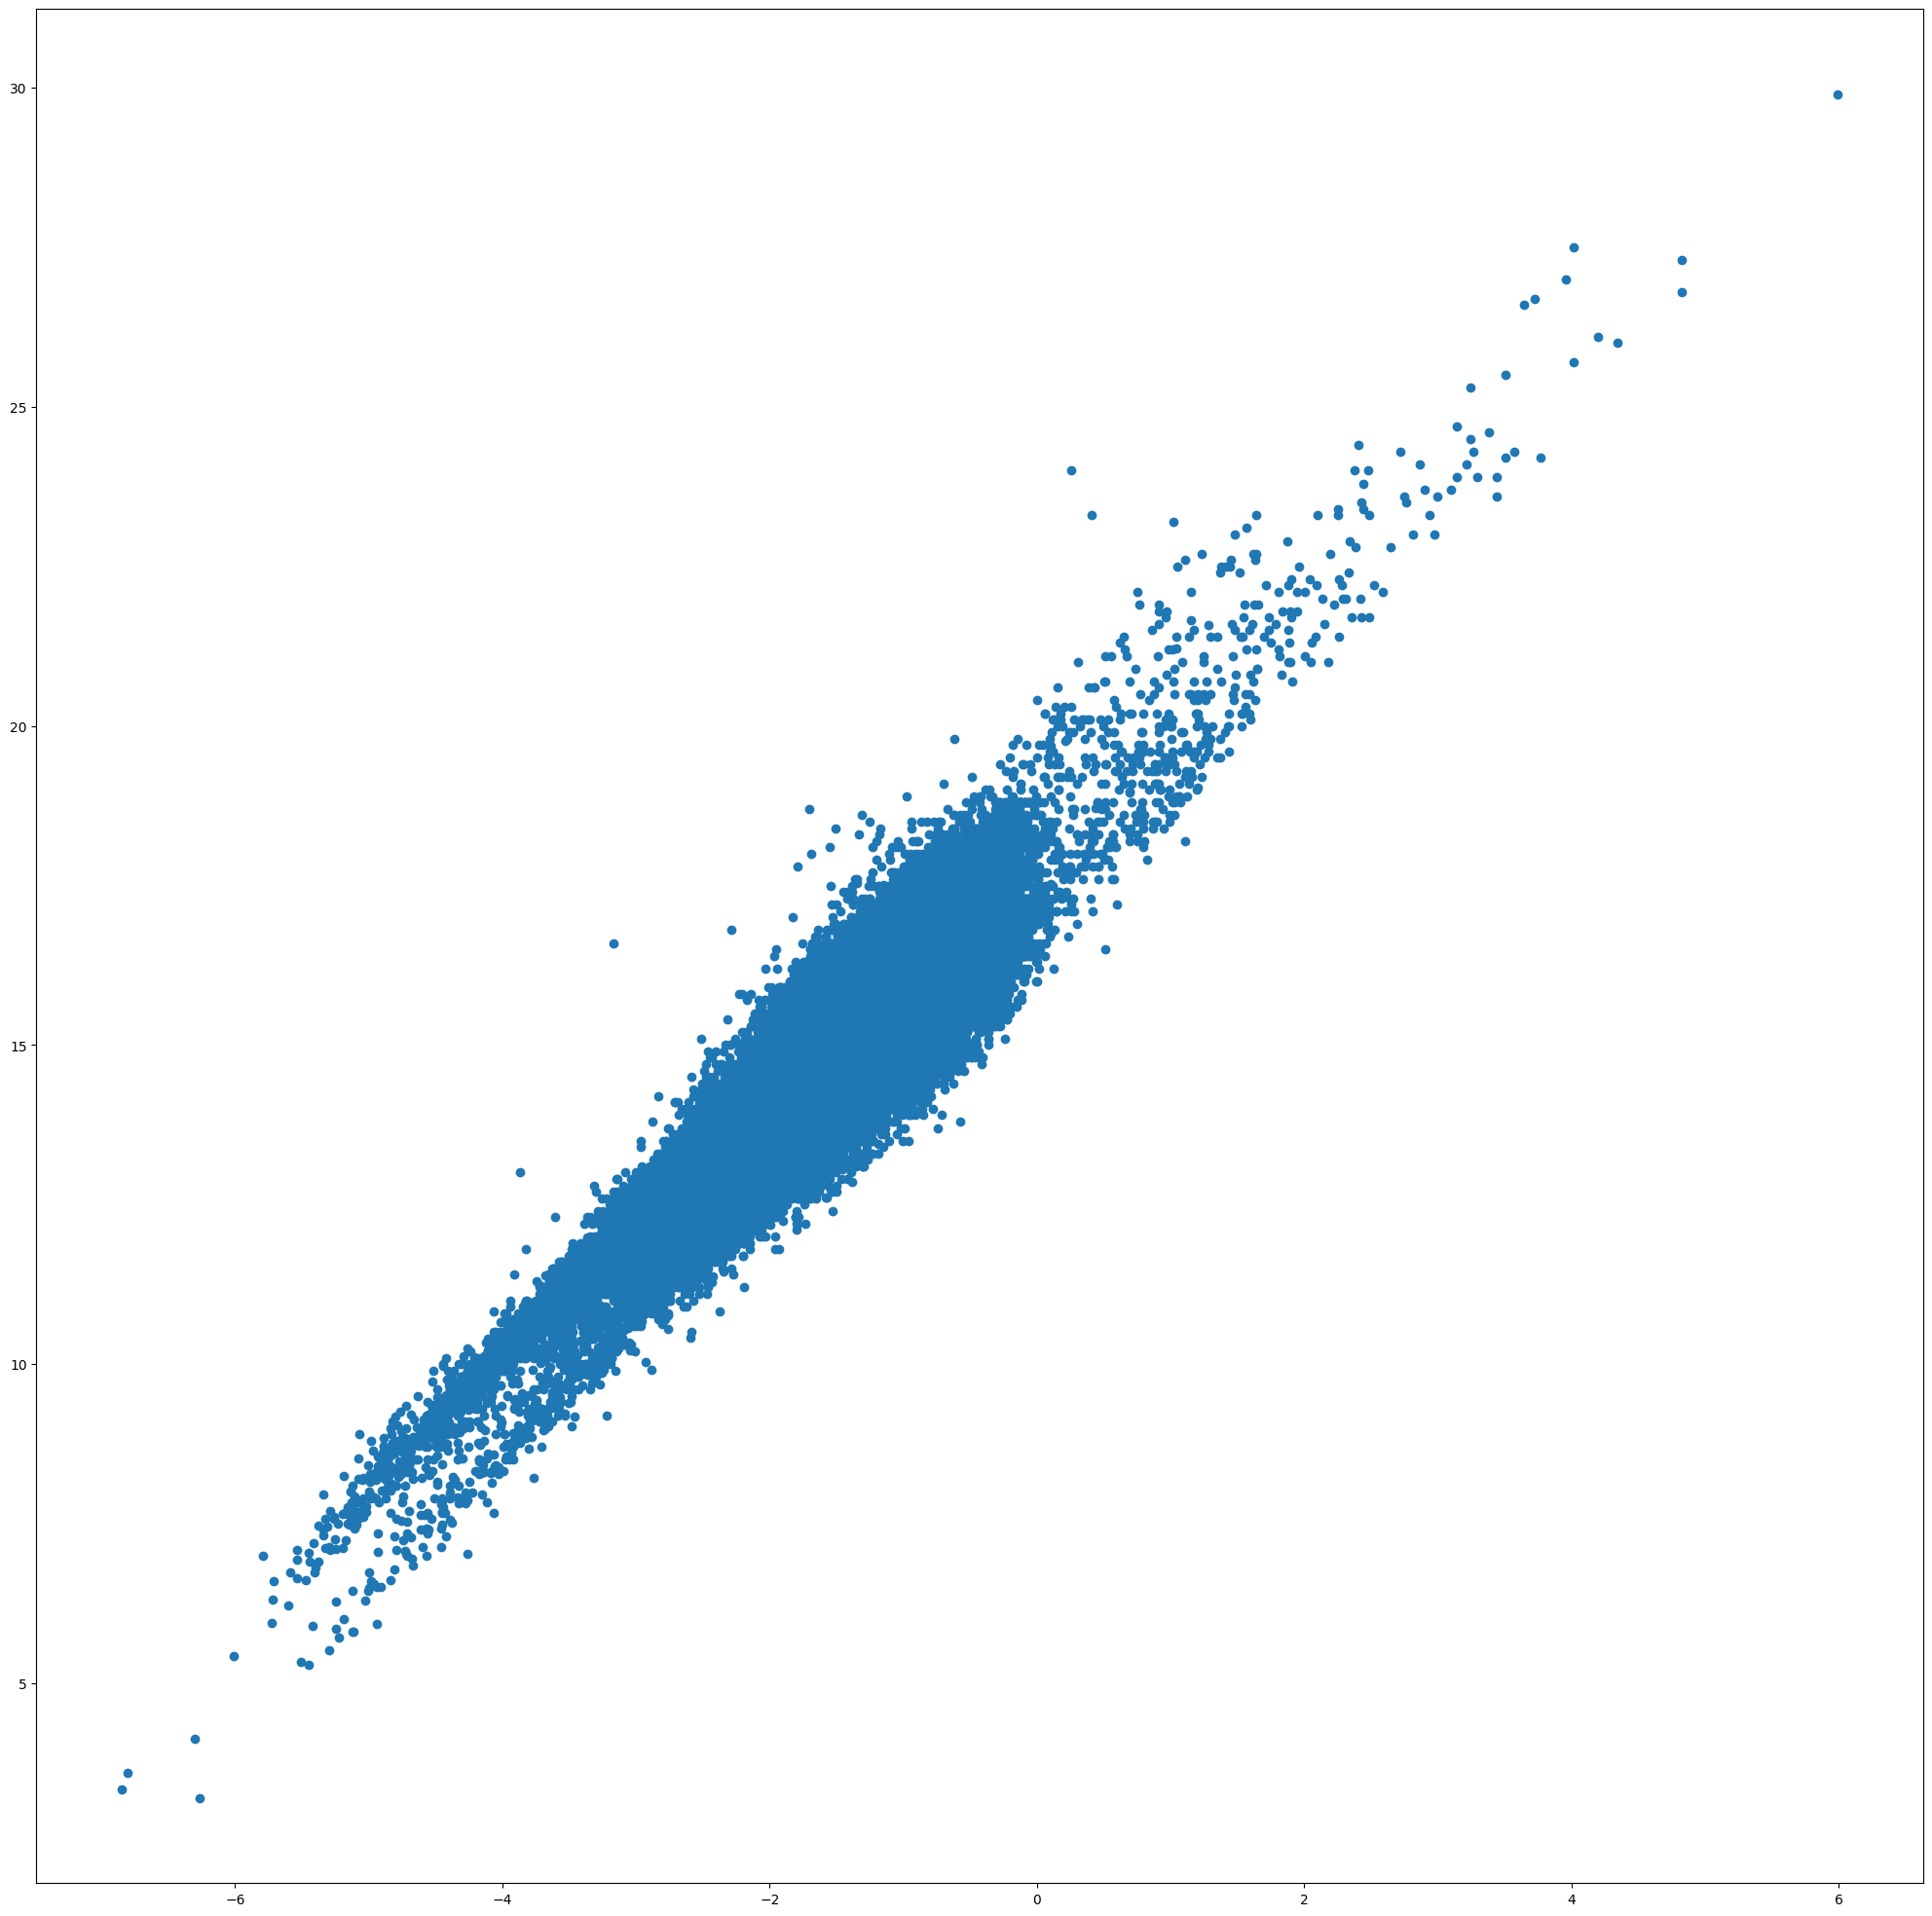

In [91]:
plt.figure(figsize=(25,25))
plt.scatter(-np.log(df['diameter']),df['H'])

<AxesSubplot: xlabel='diameter', ylabel='new_H'>

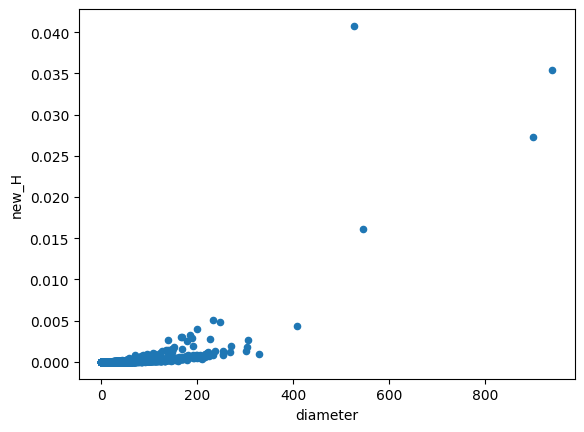

In [93]:
df=df.assign(new_H=lambda x: np.e**(-x.H))
df.plot(kind = 'scatter', x = 'diameter', y = 'new_H')